## LAB2: Classificadores baseados em distâncias entre pontos

<hr style="border:1px  solid black"> </hr>

### (Preencher)
## Nome: Pedro Henriques
## Número: 45415

<hr style="border:1px  solid black"> </hr>

## Desenvolva e corra o código pedido nas células imediatamente abaixo das perguntas.

# IMPORTANTE:
## Uma vez completado, grave este Jupyter notebook com o seguinte nome:
## Axxxxx-Lab2.ipynb (Axxxxx: número de aluno)
##  e depois submeta o ficheiro no link do Moodle providenciado para o efeito.

<hr style="border:2px solid black"> </hr>

## Considere o ficheiro pickle $\texttt{Lab2Data.p}$
### Neste ficheiro encontra-se um dicionário de Python com as seguintes variáveis:
### 1. "X":             dados bi-dimensionais (840 amostras)
### 2. "y":              classe dos dados (inteiros de 0 a 3)
### 3. "foldTrain": array boleano indicando os dados a serem usados para treinar os classificadores
### 3. "foldTest": array boleano indicando os dados a serem usados para testar os classificadores


<hr style="border:2px solid black"> </hr>

# Pergunta 1 - Classificadores da distância ao centroide:
## 1. Use os dados de treino para estimar os centroides de cada classe. Imprima os valores obtidos para cada classe, indicando a classe em questão.
## 2. Com a métrica de distância euclideana, calcule a matriz de confusão e o número total de erros nos dados de teste.
## 3. Com a métrica de distância de cosseno, calcule a matriz de confusão e o número total de erros nos dados de teste.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial.distance as spd
import pickle
from sklearn.metrics import confusion_matrix


In [3]:
fName = 'Lab2Data.p'
D = pickle.load(open(fName, 'rb'))

print(D.keys())
X = D['X']
y = D['y']
f1 = D['foldTrain']
f2 = D['foldTest']


#medias 
m0 = np.mean(X[:,y==0], axis=1)
m1 = np.mean(X[:,y==1], axis=1)
m2 = np.mean(X[:,y==2], axis=1)
m3 = np.mean(X[:,y==3], axis=1)
print('classes' , np.unique(y)) 
print('\nCENTROS\n', 'classe 0 ' , m0 , 'classe 1 ' , m1 , 'classe 2 ', m2, ' classe 3 ' , m3)

dict_keys(['X', 'y', 'foldTrain', 'foldTest'])
classes [0. 1. 2. 3.]

CENTROS
 classe 0  [ 5.22915766 -2.89554056] classe 1  [-3.29135882 -2.60751409] classe 2  [-1.71711048  1.24521526]  classe 3  [0.04809114 5.20207983]


In [4]:
## distancias

D0 = np.sqrt(np.sum((X-m0[:, np.newaxis])**2, axis = 0))
D1 = np.sqrt(np.sum((X-m1[:, np.newaxis])**2, axis = 0)) 
D2 = np.sqrt(np.sum((X-m2[:, np.newaxis])**2, axis = 0))
D3 = np.sqrt(np.sum((X-m3[:, np.newaxis])**2, axis = 0))

D = np.vstack((D0, D1, D2, D3))
ye = np.argmin(D, axis = 0)

MC = confusion_matrix(y,ye)
print('MC\n' ,MC )
print('total erros' , np.sum(y!=ye))

MC
 [[213   0   0   0]
 [  3 246   0   0]
 [  0  11 148  18]
 [  1   0  14 186]]
total erros 47


In [5]:
from scipy.linalg import inv, pinv

S0 = np.cov(X[:,y==0])
S0i = pinv(S0)
Xtmp = X - m0[:,np.newaxis]
D0 = np.sqrt(np.sum(Xtmp*np.dot(S0i, Xtmp) , axis=0))

S1 = np.cov(X[:,y==1])
S1i = pinv(S1)
Xtmp = X - m1[:,np.newaxis]
D1 = np.sqrt(np.sum(Xtmp*np.dot(S1i, Xtmp) , axis=0))

S2 = np.cov(X[:,y==2])
S2i = pinv(S2)
Xtmp = X - m2[:,np.newaxis]
D2 = np.sqrt(np.sum(Xtmp*np.dot(S2i, Xtmp) , axis=0))

S3 = np.cov(X[:,y==3])
S3i = pinv(S3)
Xtmp = X - m3[:,np.newaxis]
D3 = np.sqrt(np.sum(Xtmp*np.dot(S3i, Xtmp) , axis=0))

D = np.vstack((D0, D1, D2, D3))
y1e = np.argmin(D, axis=0)

MC= confusion_matrix(y,y1e)
print(MC) 
print(np.sum(y!=y1e))

[[213   0   0   0]
 [  2 243   4   0]
 [  0   0 165  12]
 [  1   0  16 184]]
35


## Solucao

In [15]:
D = pickle.load(open(fName, 'rb'))

X = D['X']
y = D['y']
f1 = D['foldTrain']
f2 = D['foldTest']


X1 = X[:,f1]
y1 = y[f1]
X2 = X[:,f2]
y2 = y[f2]

m0 = np.mean(X1[:,y1==0], axis=1)
m1 = np.mean(X1[:,y1==1], axis=1)
m2 = np.mean(X1[:,y1==2], axis=1)
m3 = np.mean(X1[:,y1==3], axis=1)

print('\nCENTROS\n', 'classe 0 ' , m0 , 'classe 1 ' , m1 , 'classe 2 ', m2, ' classe 3 ' , m3)


D0 = np.sqrt(np.sum((X2-m0[:, np.newaxis])**2, axis = 0))
D1 = np.sqrt(np.sum((X2-m1[:, np.newaxis])**2, axis = 0)) 
D2 = np.sqrt(np.sum((X2-m2[:, np.newaxis])**2, axis = 0))
D3 = np.sqrt(np.sum((X2-m3[:, np.newaxis])**2, axis = 0))

D = np.vstack((D0, D1, D2, D3))
y2e = np.argmin(D, axis = 0)
print(confusion_matrix(y2, y2e))
print(np.sum(y2!=y2e))



nx2 = np.sqrt(np.sum(X2**2, axis = 0))
X2n = X2/nx2

m0n = m0/np.sqrt(np.sum(m0**2))
D0c= 1-np.dot(m0n,X2n)
m1n = m1/np.sqrt(np.sum(m1**2))
D1c= 1-np.dot(m1n,X2n)
m2n = m2/np.sqrt(np.sum(m2**2))
D2c= 1-np.dot(m2n,X2n)
m3n = m2/np.sqrt(np.sum(m3**2))
D3c= 1-np.dot(m3n,X2n)


D = np.vstack((D0c, D1c, D2c, D3c))
y2e = np.argmin(D, axis = 0)
print(confusion_matrix(y2, y2e))
print(np.sum(y2!=y2e))




CENTROS
 classe 0  [ 5.14228406 -3.01407307] classe 1  [-3.25743758 -2.53544477] classe 2  [-1.68691942  1.46970542]  classe 3  [0.11366889 5.28098864]
[[160   0   0   0]
 [  3 186   0   0]
 [  0  16 104   4]
 [  1   0  16 132]]
40
[[160   0   0   0]
 [  5 184   0   0]
 [  8  39  77   0]
 [  5   0 144   0]]
201


# Pergunta 2 - Classificadores dos k-vizinhos mais próximos:
## (Use os dados de treino nestes classificadores)
## 1. Para k=1, calcule a matriz de confusão e o número total de erros nos dados de teste. 
## 2. Faça um plot dos dados de teste por classe e dos erros cometidos por este classificador.
## 3. Repita as duas alíneas anteriores para k=5

In [17]:
from sklearn.neighbors import KNeighborsClassifier

X1=X[:,f1].T
X2=X[:,f2].T
y1=y[f1]
y2=y[f2]

knn = KNeighborsClassifier(n_neighbors=1).fit(X1,y1)
y2e= knn.predict(X2)
print('Erros', np.sum(y2e!=y2))
print('MC\n' , confusion_matrix(y2,y2e))


Erros 16
MC
 [[160   0   0   0]
 [  1 188   0   0]
 [  0   0 123   1]
 [  1   0  13 135]]


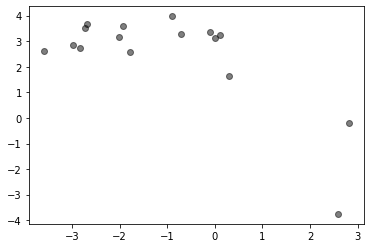

In [18]:
plt.plot(X2[y2!=y2e, 0], X2[y2!=y2e, 1],'ok', alpha=0.5)



## Solucao

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1).fit(X1,y1)
y2e= knn.predict(X2)
print('Erros', np.sum(y2e!=y2))
print('MC\n' , confusion_matrix(y2,y2e))


Erros 16
MC
 [[160   0   0   0]
 [  1 188   0   0]
 [  0   0 123   1]
 [  1   0  13 135]]
